In [53]:
import sklearn #scikit-learn
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
df_tips=sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### QUICK TASK
- Buat Model Simple Linear Regresi dengan Feature Total Bill dan Target Tip
- Hingga di bagian Analisa Error
- Gunakan Histogram untuk Melihat Distribusi Error

In [55]:
from sklearn import linear_model

In [56]:
Model=linear_model.LinearRegression()
Model.fit(df_tips[['total_bill']],df_tips['tip'])

LinearRegression()

In [57]:
df_tips['target_tip']=Model.predict(df_tips[['tip']]).round(2)
df_tips['selisih']=abs(df_tips['tip']-df_tips['target_tip'])
df_tips['selisih(%)']=(df_tips['selisih']/df_tips['tip']*100).round(2)
df_tips

,total_bill,tip,sex,smoker,day,time,size,target_tip,selisih,selisih(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,1.03,0.02,1.98
1,10.34,1.66,Male,No,Sun,Dinner,3,1.09,0.57,34.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1.29,2.21,63.14
3,23.68,3.31,Male,No,Sun,Dinner,2,1.27,2.04,61.63
4,24.59,3.61,Female,No,Sun,Dinner,4,1.30,2.31,63.99
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.54,4.38,73.99
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.13,0.87,43.50
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.13,0.87,43.50
242,17.82,1.75,Male,No,Sat,Dinner,2,1.10,0.65,37.14


In [58]:
df_tips['selisih'].mean()

1.7636475409836068

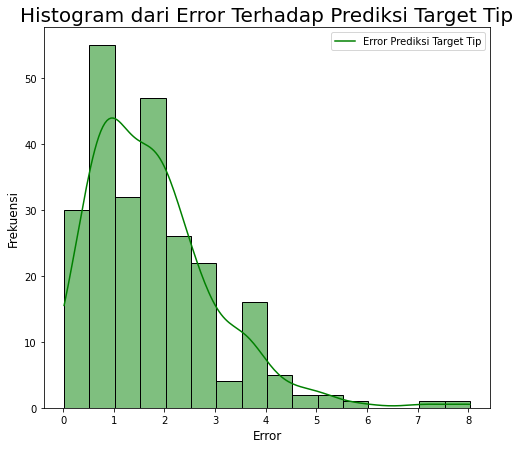

In [66]:
plt.figure(figsize=(8,7))
sns.histplot(df_tips['selisih'],bins=16,color='green',kde=True)
plt.title('Histogram dari Error Terhadap Prediksi Target Tip',size=20)
plt.xlabel('Error',size=12)
plt.ylabel('Frekuensi',size=12)
plt.legend(['Error Prediksi Target Tip'],loc=0)
plt.show()

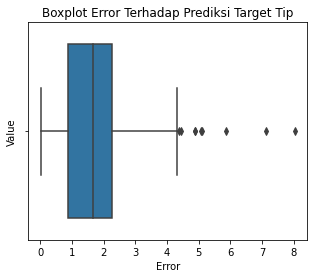

In [68]:
plt.figure(figsize=(5,4))
sns.boxplot(df_tips['selisih'])
plt.title('Boxplot Error Terhadap Prediksi Target Tip')
plt.xlabel('Error')
plt.ylabel('Value')
plt.show()